In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

original_df_2 = pd.read_csv("results/balanced_accuracy_1.csv")
original_df_1 = pd.read_csv("results/balanced_accuracy_2.csv")
original_df_2.columns = [
    "data_set",
    "optimizer",
    "seed_42_acc",
    "seed_43_acc",
    "seed_44_acc",
    "seed_45_acc",
    "seed_46_acc",
]

original_df_3 = pd.read_csv("results/balanced_accuracy_3.csv")
original_df_3.columns = [
    "data_set",
    "optimizer",
    "seed_42_acc",
    "seed_43_acc",
    "seed_44_acc",
    "seed_45_acc",
    "seed_46_acc",
]
original_df = pd.concat([original_df_1, original_df_2, original_df_3], axis=0)

In [155]:
original_df_1.columns

Index(['data_set', 'optimizer', 'seed_42_acc', 'seed_43_acc', 'seed_44_acc',
       'seed_45_acc', 'seed_46_acc'],
      dtype='object')

In [156]:
original_df_2.columns

Index(['data_set', 'optimizer', 'seed_42_acc', 'seed_43_acc', 'seed_44_acc',
       'seed_45_acc', 'seed_46_acc'],
      dtype='object')

In [157]:
original_df_3.columns

Index(['data_set', 'optimizer', 'seed_42_acc', 'seed_43_acc', 'seed_44_acc',
       'seed_45_acc', 'seed_46_acc'],
      dtype='object')

In [158]:
original_df

,data_set,optimizer,seed_42_acc,seed_43_acc,seed_44_acc,seed_45_acc,seed_46_acc
0,mstz/blood,adam,0.718750,0.703571,0.699764,0.560284,0.676923
1,mstz/blood,dt,0.563860,0.641026,0.560524,0.612665,0.613850
2,mstz/blood,irls,0.714286,0.900685,0.820690,0.581866,0.727993
3,mstz/blood,lda,0.509089,0.560606,0.551491,0.508936,0.582787
4,mstz/blood,qda,0.564339,0.582751,0.543812,0.651904,0.609718
...,...,...,...,...,...,...,...
23,diabetes_data,irls+int,0.769447,0.768667,0.753989,0.725319,0.752883
24,diabetes_data,lda+int,0.797407,0.802110,0.798351,0.759656,0.792790
25,diabetes_data,qda+int,0.823069,0.817120,0.781945,0.765890,0.795333
26,diabetes_data,dt+int,0.978489,0.979612,0.960562,0.962291,0.958282


In [159]:
original_df.loc[:, "optimizer"] = original_df.loc[:, "optimizer"].str.strip()
original_df.loc[:, "data_set"] = original_df.loc[:, "data_set"].str.strip()

mstz/blood
jlh/uci-shopper
mstz/heart_failure
nba_data
smoking_data
banana_data
biodeg_data
parkinson_data
diabetes_data


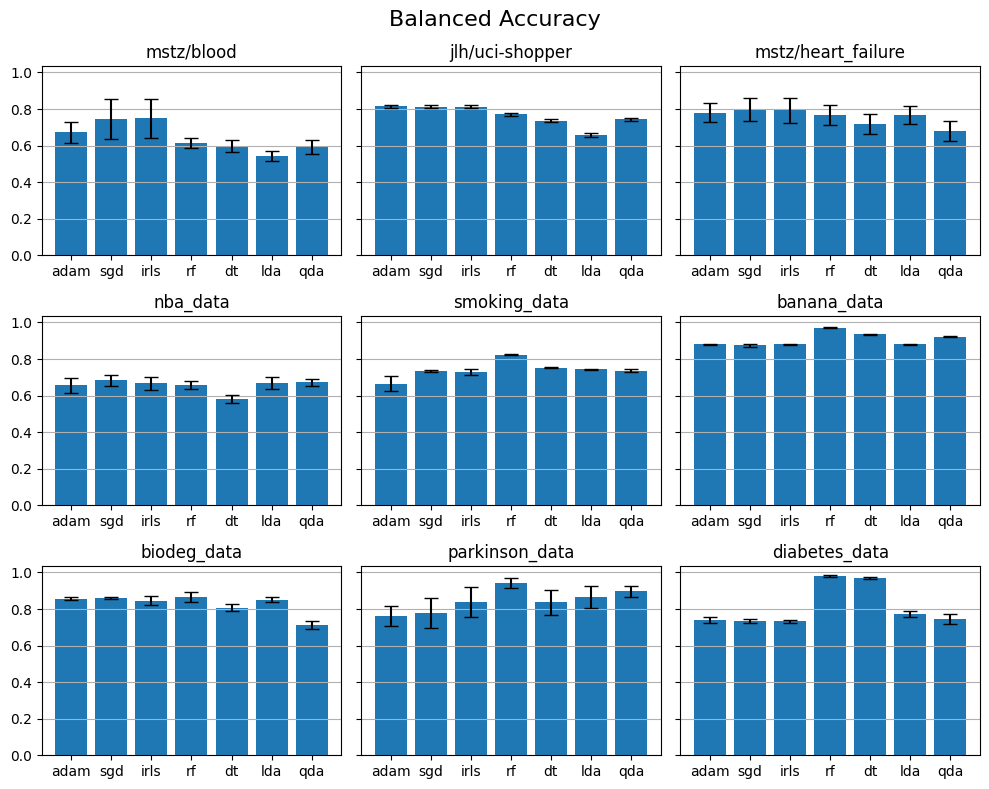

In [161]:
# Assuming original_df and optimizers are predefined
optimizers = ["adam", "sgd", "irls", "rf", "dt", "lda", "qda"]
unique_datasets = original_df["data_set"].unique()
n_datasets = len(unique_datasets)

# Calculate the grid size for subplots
n_cols = 3
n_rows = n_datasets // n_cols + (n_datasets % n_cols > 0)

fig, axs = plt.subplots(
    n_rows, n_cols, figsize=(10, 8), sharey=True
)  # Adjust the figure size as needed
axs = axs.flatten()  # Flatten the array to iterate easily
for i, dataset_name in enumerate(unique_datasets):
    print(dataset_name)
    df = original_df.loc[original_df["data_set"] == dataset_name].copy()
    df["mean_acc"] = df.iloc[:, 2:].mean(axis=1)
    df["std_acc"] = df.iloc[:, 2:].std(axis=1)

    x = np.arange(len(optimizers))
    width = 0.8  # the width of the bars

    small_df = df[df["optimizer"].isin(optimizers)]
    small_df = small_df.set_index("optimizer").loc[optimizers]

    axs[i].bar(
        x,
        small_df["mean_acc"],
        width,
        yerr=small_df["std_acc"],
        label="Mean Accuracy",
        capsize=5,
    )
    # axs[i].set_ylabel('Balanced Accuracy')
    axs[i].set_title(f"{dataset_name}")
    axs[i].set_xticks(x)
    axs[i].set_xticklabels(small_df.index.values)
    # axs[i].set_xlabel('Algorithm')
    axs[i].grid(axis="y")

# If there are any remaining subplots in the grid that weren't used, hide them
for j in range(i + 1, n_rows * n_cols):
    fig.delaxes(axs[j])

fig.suptitle("Balanced Accuracy", fontsize=16)
plt.tight_layout()
plt.savefig("results/balanced_accuracy_cmp.jpg", dpi=200)
plt.show()

In [162]:
unique_datasets

array(['mstz/blood', 'jlh/uci-shopper', 'mstz/heart_failure', 'nba_data',
       'smoking_data', 'banana_data', 'biodeg_data', 'parkinson_data',
       'diabetes_data'], dtype=object)

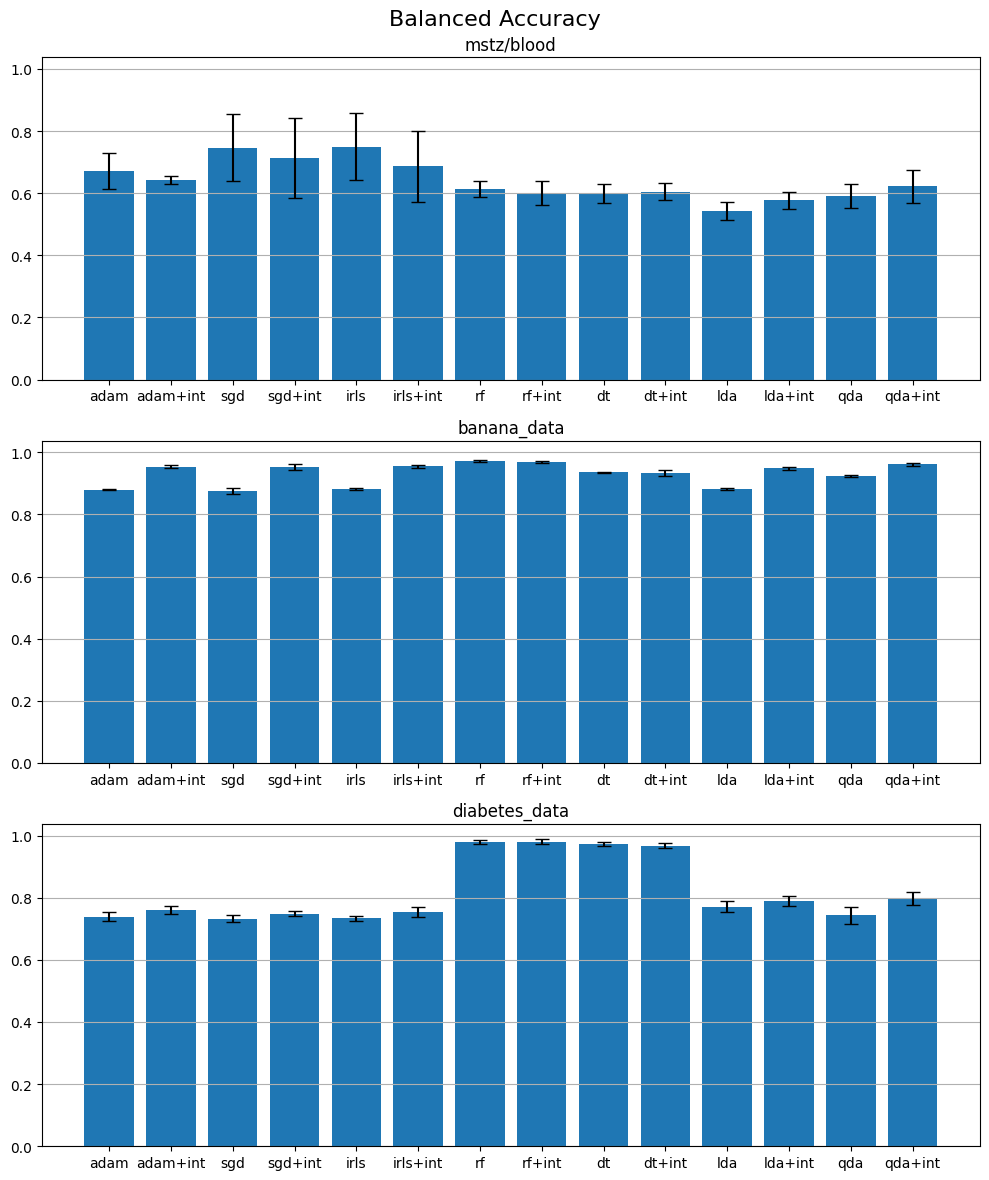

In [163]:
# Assuming original_df and optimizers are predefined
optimizers_init = ["adam", "sgd", "irls", "rf", "dt", "lda", "qda"]
optimizers = []
for optimizer in optimizers_init:
    optimizers.append(optimizer)
    optimizers.append(optimizer + "+int")
unique_datasets = ["mstz/blood", "banana_data", "diabetes_data"]
n_datasets = len(unique_datasets)

# Calculate the grid size for subplots
n_cols = 1
n_rows = n_datasets // n_cols + (n_datasets % n_cols > 0)

fig, axs = plt.subplots(
    n_rows, n_cols, figsize=(10, 12), sharey=True
)  # Adjust the figure size as needed
axs = axs.flatten()  # Flatten the array to iterate easily
for i, dataset_name in enumerate(unique_datasets):
    df = original_df.loc[original_df["data_set"] == dataset_name].copy()
    df["mean_acc"] = df.iloc[:, 2:].mean(axis=1)
    df["std_acc"] = df.iloc[:, 2:].std(axis=1)

    x = np.arange(len(optimizers))
    width = 0.8  # the width of the bars

    small_df = df[df["optimizer"].isin(optimizers)]
    small_df = small_df.set_index("optimizer").loc[optimizers]

    axs[i].bar(
        x,
        small_df["mean_acc"],
        width,
        yerr=small_df["std_acc"],
        label="Mean Accuracy",
        capsize=5,
    )
    # axs[i].set_ylabel('Balanced Accuracy')
    axs[i].set_title(f"{dataset_name}")
    axs[i].set_xticks(x)
    axs[i].set_xticklabels(small_df.index.values)
    # axs[i].set_xlabel('Algorithm')
    axs[i].grid(axis="y")

# If there are any remaining subplots in the grid that weren't used, hide them
for j in range(i + 1, n_rows * n_cols):
    fig.delaxes(axs[j])

fig.suptitle("Balanced Accuracy", fontsize=16)
plt.tight_layout()
plt.savefig("results/balanced_accuracy_with_int_cmp.jpg", dpi=200)
plt.show()

In [3]:
import os

results_dir = "results"
dfs = []

for file in os.listdir(results_dir):
    file_path = os.path.join(results_dir, file)
    if os.path.isfile(file_path):
        df = pd.read_csv(file_path)
        dfs.append(df)

combined_df = pd.concat(dfs)
combined_df["mean_acc"] = combined_df[
    ["seed_42_acc", "seed_43_acc", "seed_44_acc", "seed_45_acc", "seed_46_acc"]
].mean(axis=1)
combined_df.head(10)

combined_df_long = pd.melt(
    combined_df,
    id_vars=["data_set", "optimizer"],
    value_vars=[
        "seed_42_acc",
        "seed_43_acc",
        "seed_44_acc",
        "seed_45_acc",
        "seed_46_acc",
    ],
    var_name="seed",
    value_name="acc",
)
combined_df_long = combined_df_long[~combined_df_long["optimizer"].str.contains("int")]
combined_df_long = combined_df_long[~combined_df_long["optimizer"].str.contains("dt")]
combined_df_long = combined_df_long[~combined_df_long["optimizer"].str.contains("rf")]
combined_df_long = combined_df_long[~combined_df_long["optimizer"].str.contains("lda")]
combined_df_long = combined_df_long[~combined_df_long["optimizer"].str.contains("qda")]
combined_df_long = combined_df_long.sort_values(["data_set", "seed"])
combined_df_long.head(10)

,data_set,optimizer,seed,acc
14,banana_data,adam,seed_42_acc,0.879203
15,banana_data,irls,seed_42_acc,0.878503
16,banana_data,sgd,seed_42_acc,0.884082
98,banana_data,adam,seed_43_acc,0.880522
99,banana_data,irls,seed_43_acc,0.881732
100,banana_data,sgd,seed_43_acc,0.885589
182,banana_data,adam,seed_44_acc,0.881827
183,banana_data,irls,seed_44_acc,0.885646
184,banana_data,sgd,seed_44_acc,0.868750
266,banana_data,adam,seed_45_acc,0.878964


/home/rucinskij/.local/lib/python3.10/site-packages/seaborn/axisgrid.py:718: UserWarning: Using the boxplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
/home/rucinskij/.local/lib/python3.10/site-packages/seaborn/axisgrid.py:854: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  func(*plot_args, **plot_kwargs)
/home/rucinskij/.local/lib/python3.10/site-packages/seaborn/axisgrid.py:854: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  func(*plot_args, **plot_kwargs)
/home/rucinskij/.local/lib/python3.10/site-packages/seaborn/axisgrid.py:854: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variab

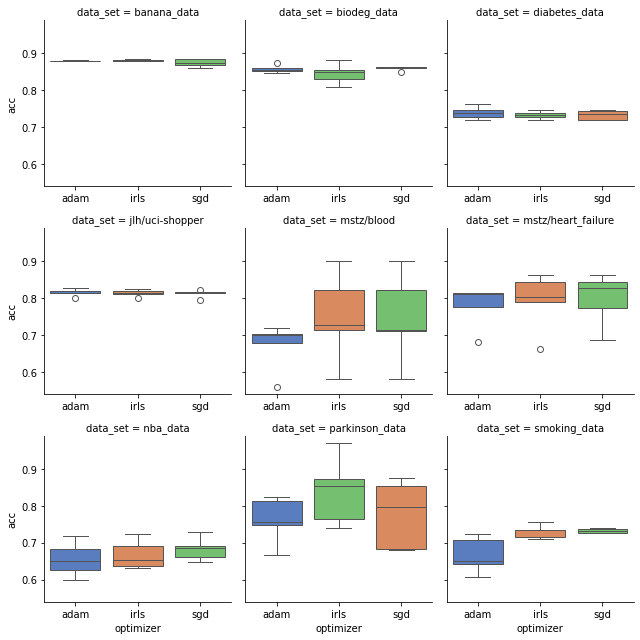

In [4]:
import seaborn as sns, matplotlib.pyplot as plt

ordered_days = sorted(combined_df_long["data_set"].unique())
g = sns.FacetGrid(combined_df_long, col="data_set", col_order=ordered_days, col_wrap=3)

g.map(sns.boxplot, "optimizer", "acc", palette="muted")
for ax in g.axes.flatten():
    ax.tick_params(labelbottom=True)

plt.tight_layout()
plt.show()

In [5]:
small_df = combined_df[
    combined_df["data_set"].isin(["banana_data", "diabetes_data", "mstz/blood"])
]
small_df["int"] = small_df["optimizer"].str.contains("int")
small_df["optimizer"] = small_df["optimizer"].str.replace("+int", "")
small_df_long = pd.melt(
    small_df,
    id_vars=["data_set", "optimizer", "int"],
    value_vars=[
        "seed_42_acc",
        "seed_43_acc",
        "seed_44_acc",
        "seed_45_acc",
        "seed_46_acc",
    ],
    var_name="seed",
    value_name="acc",
)
small_df_long

/tmp/ipykernel_56018/1872380146.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  small_df['int'] = small_df['optimizer'].str.contains('int')
/tmp/ipykernel_56018/1872380146.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  small_df['optimizer'] = small_df['optimizer'].str.replace('+int', '')


,data_set,optimizer,int,seed,acc
0,banana_data,adam,False,seed_42_acc,0.879203
1,banana_data,irls,False,seed_42_acc,0.878503
2,banana_data,sgd,False,seed_42_acc,0.884082
3,banana_data,lda,False,seed_42_acc,0.880127
4,banana_data,qda,False,seed_42_acc,0.925509
...,...,...,...,...,...
205,mstz/blood,irls,True,seed_46_acc,0.688889
206,mstz/blood,lda,True,seed_46_acc,0.626959
207,mstz/blood,qda,True,seed_46_acc,0.710459
208,mstz/blood,rf,True,seed_46_acc,0.652465


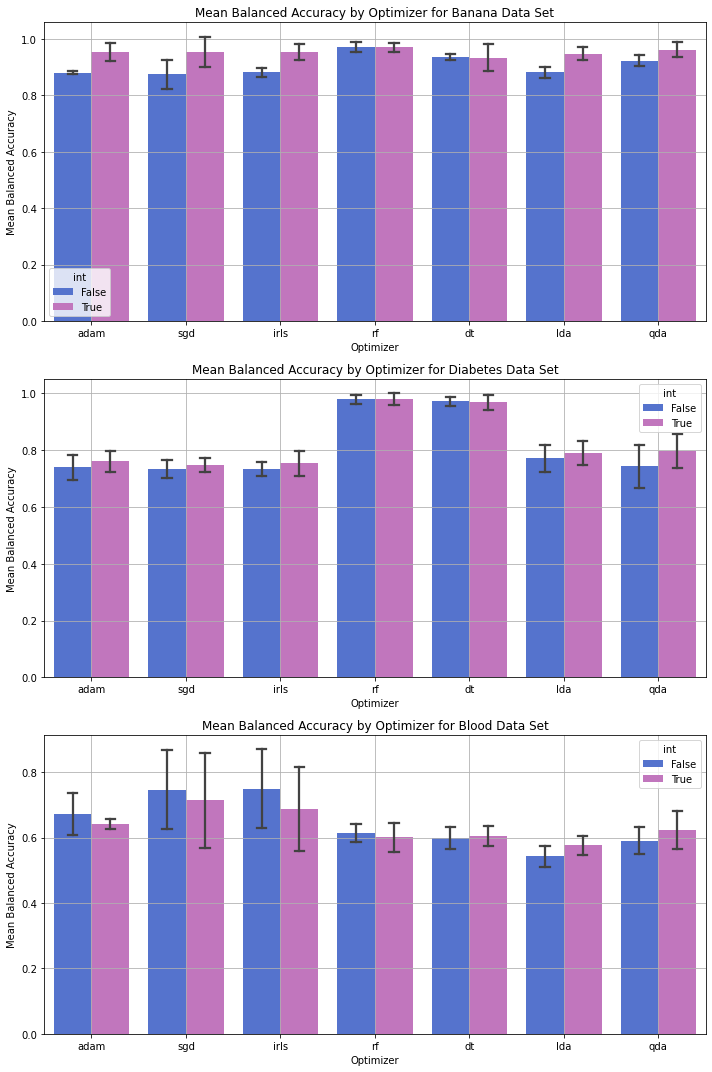

In [6]:
import seaborn as sns

royalblue1 = (65 / 255, 105 / 255, 225 / 255)
orchid3 = (205 / 255, 105 / 255, 201 / 255)

fig, axs = plt.subplots(3, 1, figsize=(10, 15))

small_df_long = small_df_long.sort_values("optimizer")
axs[1].set_title("Mean Balanced Accuracy by Optimizer for Diabetes Data Set")
sns.barplot(
    ax=axs[0],
    data=small_df_long[small_df_long["data_set"] == "banana_data"],
    x="optimizer",
    y="acc",
    hue="int",
    palette=[royalblue1, orchid3],
    dodge=True,
    errorbar=("sd", 5),
    capsize=0.2,
    order=["adam", "sgd", "irls", "rf", "dt", "lda", "qda"],
)
axs[0].set_title("Mean Balanced Accuracy by Optimizer for Banana Data Set")
axs[0].set_xlabel("Optimizer")
axs[0].set_ylabel("Mean Balanced Accuracy")
axs[0].grid()

sns.barplot(
    ax=axs[1],
    data=small_df_long[small_df_long["data_set"] == "diabetes_data"],
    x="optimizer",
    y="acc",
    hue="int",
    palette=[royalblue1, orchid3],
    dodge=True,
    errorbar=("sd", 2.5),
    capsize=0.2,
    order=["adam", "sgd", "irls", "rf", "dt", "lda", "qda"],
)
axs[1].set_title("Mean Balanced Accuracy by Optimizer for Diabetes Data Set")
axs[1].set_xlabel("Optimizer")
axs[1].set_ylabel("Mean Balanced Accuracy")
axs[1].grid()

sns.barplot(
    ax=axs[2],
    data=small_df_long[small_df_long["data_set"] == "mstz/blood"],
    x="optimizer",
    y="acc",
    hue="int",
    palette=[royalblue1, orchid3],
    dodge=True,
    errorbar=("sd", 1),
    capsize=0.2,
    order=["adam", "sgd", "irls", "rf", "dt", "lda", "qda"],
)
axs[2].set_title("Mean Balanced Accuracy by Optimizer for Blood Data Set")
axs[2].set_xlabel("Optimizer")
axs[2].set_ylabel("Mean Balanced Accuracy")
axs[2].grid()

plt.tight_layout()
plt.show()